<a href="https://colab.research.google.com/github/treylonwofford/NLP_Projects/blob/main/most_word.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##1. Tools for text processing
We'll check which words are used the most in "The Logic of Chance, 3rd edition by John Venn" and how often.
We'll get the book from the website using Python requests with the NLP toolkit(nltk)

In [32]:
# Import requests, BeautifulSoup and nltk
import requests
from bs4 import BeautifulSoup
import nltk

##2. Request from Website


In [33]:
r = requests.get("https://www.gutenberg.org/cache/epub/57359/pg57359-images.html")
r.encoding = 'utf-8'
html = r.text
html[:2000]

'<!DOCTYPE html>\r\n<html lang="en">\r\n<head>\r\n<meta charset="utf-8"><style>\r\n#pg-header div, #pg-footer div {\r\n    all: initial;\r\n    display: block;\r\n    margin-top: 1em;\r\n    margin-bottom: 1em;\r\n    margin-left: 2em;\r\n}\r\n#pg-footer div.agate {\r\n    font-size: 90%;\r\n    margin-top: 0;\r\n    margin-bottom: 0;\r\n    text-align: center;\r\n}\r\n#pg-footer li {\r\n    all: initial;\r\n    display: block;\r\n    margin-top: 1em;\r\n    margin-bottom: 1em;\r\n    text-indent: -0.6em;\r\n}\r\n#pg-footer div.secthead {\r\n    font-size: 110%;\r\n    font-weight: bold;\r\n}\r\n#pg-footer #project-gutenberg-license {\r\n    font-size: 110%;\r\n    margin-top: 0;\r\n    margin-bottom: 0;\r\n    text-align: center;\r\n}\r\n#pg-header-heading {\r\n    all: inherit;\r\n    text-align: center;\r\n    font-size: 120%;\r\n    font-weight:bold;\r\n}\r\n#pg-footer-heading {\r\n    all: inherit;\r\n    text-align: center;\r\n    font-size: 120%;\r\n    font-weight: normal;\r\n 

## 3. Get the text from the HTML
For this we'll use the package BeautifulSoup

In [34]:
soup = BeautifulSoup(html, "lxml")

text = soup.get_text()

text[32000:34000]

"ese.\n\n\n9.\xa0Discussion of an objection.\n\n\n10, 11.\xa0Testimony of worthless witnesses.\n\n\n12–14.\xa0Common practical ways of regarding such problems.\n\n\n15.\xa0Extraordinary stories not necessarily less probable.\n\n\n16–18.\xa0Meaning of the term extraordinary, and its distinction from\r\nmiraculous.\n\nxxviii\n\n19, 20.\xa0Combination of testimony.\n\n\n21, 22.\xa0Scientific meaning of a miracle.\n\n\n23, 24.\xa0Two distinct prepossessions in regard to miracles, and the logical\r\nconsequences of these.\n\n\n25.\xa0Difficulty of discussing by our rules cases in which arbitrary\r\ninterference can be postulated.\n\n\n26, 27.\xa0Consequent inappropriateness of many arguments.\n\n CHAPTER XVIII.\nON THE NATURE AND USE OF AN AVERAGE, AND ON THE DIFFERENT KINDS OF AVERAGE.\n\n§:nbsp;1.\xa0Preliminary rude notion of an average,\n\n\n2.\xa0More precise quantitative notion, yielding\n\n\n\xa0(1) the Arithmetical Average,\n\n\n3.\xa0(2) the Geometrical.\n\n\n4.\xa0In asymmetrical 

##4. Extracts the words

In [35]:
tokenizer = nltk.tokenize.RegexpTokenizer(pattern='\w+')

tokens = tokenizer.tokenize(text = text)

tokens[:50]

['The',
 'Project',
 'Gutenberg',
 'eBook',
 'of',
 'The',
 'Logic',
 'of',
 'Chance',
 'by',
 'John',
 'Venn',
 'The',
 'Project',
 'Gutenberg',
 'eBook',
 'of',
 'The',
 'Logic',
 'of',
 'Chance',
 '3rd',
 'edition',
 'This',
 'ebook',
 'is',
 'for',
 'the',
 'use',
 'of',
 'anyone',
 'anywhere',
 'in',
 'the',
 'United',
 'States',
 'and',
 'most',
 'other',
 'parts',
 'of',
 'the',
 'world',
 'at',
 'no',
 'cost',
 'and',
 'with',
 'almost',
 'no']

##5. Make the words lowercase

In [36]:
words = [token.lower() for token in tokens]

# printing out the first 8 words / tokens
words[:8]

['the', 'project', 'gutenberg', 'ebook', 'of', 'the', 'logic', 'of']

##6. Load in the stop words
Using stop words to take out words like 'the', 'of', and 'a'.

In [37]:
# get stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [38]:
sw = nltk.corpus.stopwords.words('english')

In [39]:
sw[:15]

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours']

##7. removing stopwords in the paper
Make a list of words from "The Logic of Chance, 3rd edition by John Venn" but without using certain common words(stop words). To do this, we'll go through each word in the original list and add it to a new list only if it's not a stop word

In [40]:
words_ns = [word for word in words if words not in sw]

words_ns[:5]

['the', 'project', 'gutenberg', 'ebook', 'of']

##8. Answering the question
What are the most frequent words in "The Logic of Chance, 3rd edition by John Venn" and how often do they occur?

We are now ready to answer that! Let's create a word frequency distribution plot using nltk.


In [41]:
%matplotlib inline

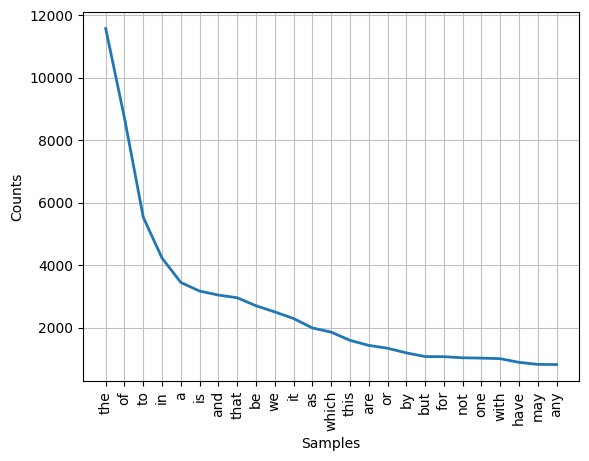

<Axes: xlabel='Samples', ylabel='Counts'>

In [42]:
freqdist = nltk.FreqDist(words_ns)

freqdist.plot(25)

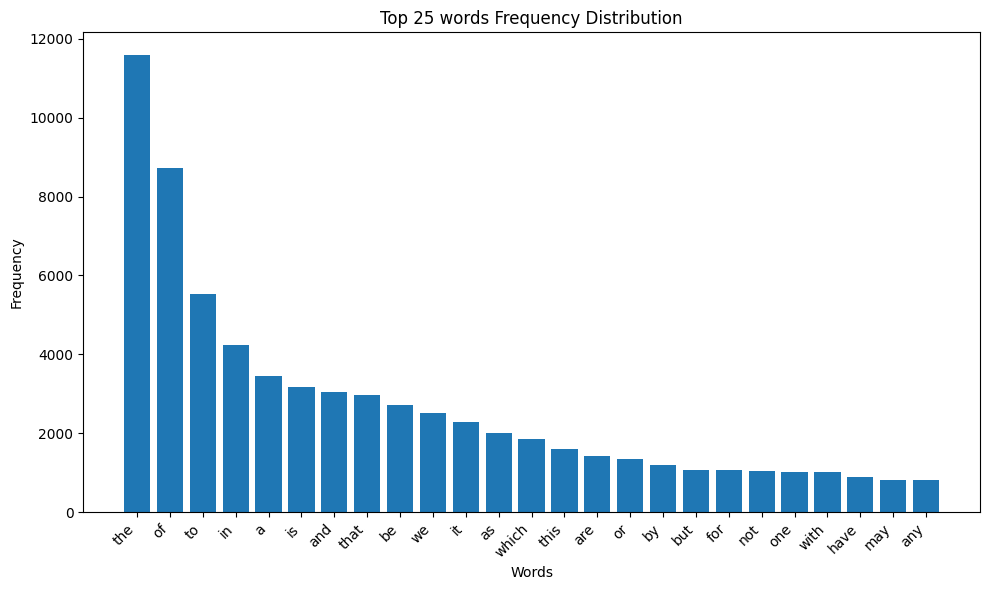

The most common word is 'the' with a frequency of 11581


In [43]:
import matplotlib.pyplot as plt

freqdist = nltk.FreqDist(words_ns)

top_words = freqdist.most_common(25)

words, frequencies = zip(*top_words)

most_common_word, most_common_frequency = freqdist.most_common(1)[0]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(range(len(words)), frequencies, tick_label=words)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 25 words Frequency Distribution')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()

print(f"The most common word is '{most_common_word}' with a frequency of {most_common_frequency}")